In [1]:
import verticapy as vp
from verticapy import vDataFrame

# Creating a new connection
vp.new_connection(
    {
        "host": "172.12.2.10",
        "port": "5433",
        "database": "vsunny",
        "password": "xxx",
        "user": "dbadmin",
    },
    name="MyVerticaConnection",
)

# Connecting to the Database
vp.connect("MyVerticaConnection")
vp.create_verticapy_schema()


/Users/husnusensoy/mconda3/envs/vertica-ml/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = vDataFrame("nyc.bike_trip_daily")


In [3]:
%load_ext verticapy.sql

,📅starttime_dtDate,123nInt
1,2013-07-17,30550
2,2013-07-23,32376
3,2013-07-29,34915
4,2013-08-09,29017
5,2013-08-10,37201

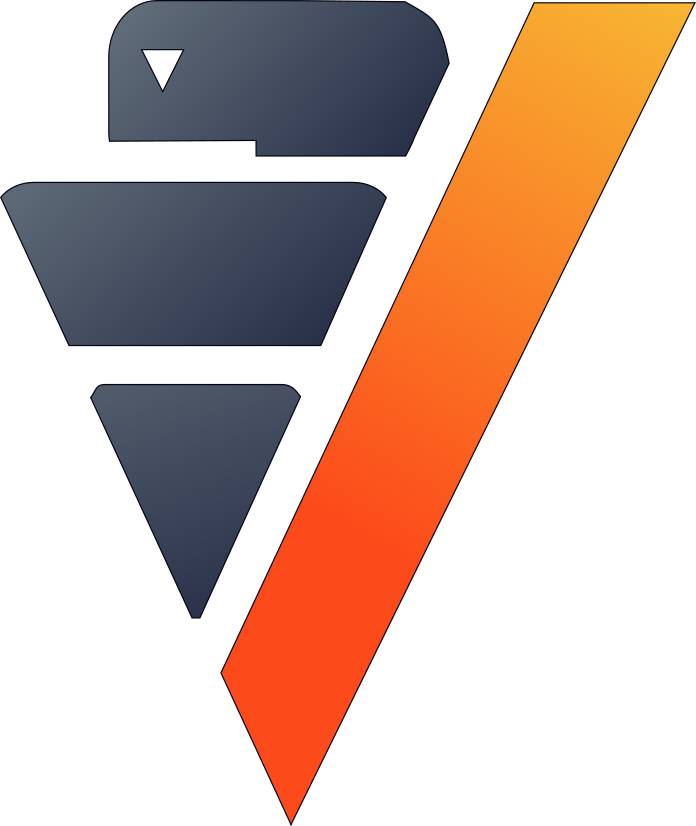

In [4]:
data.head()


Partial Auto Correlation kullanarak kullancak olduğumuz azami lag değişkenine kadar vermek için bir heuristik methot kullanıyoruz

  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:42<00:00,  4.72s/it]


,value,confidence
1,0.856377579192019,0.05486845783435862
2,0.159156556757985,0.05626320041590281
3,0.162223798006834,0.05767786164518162
4,0.160432546041356,0.059031252925747166
5,0.234418132313577,0.06180080276458188
6,0.25614089609529,0.06495330023889435
7,0.210017881194557,0.06700062251614683
8,-0.0218405176648122,0.06704855605651802
9,0.00620936283934443,0.06707673097587849

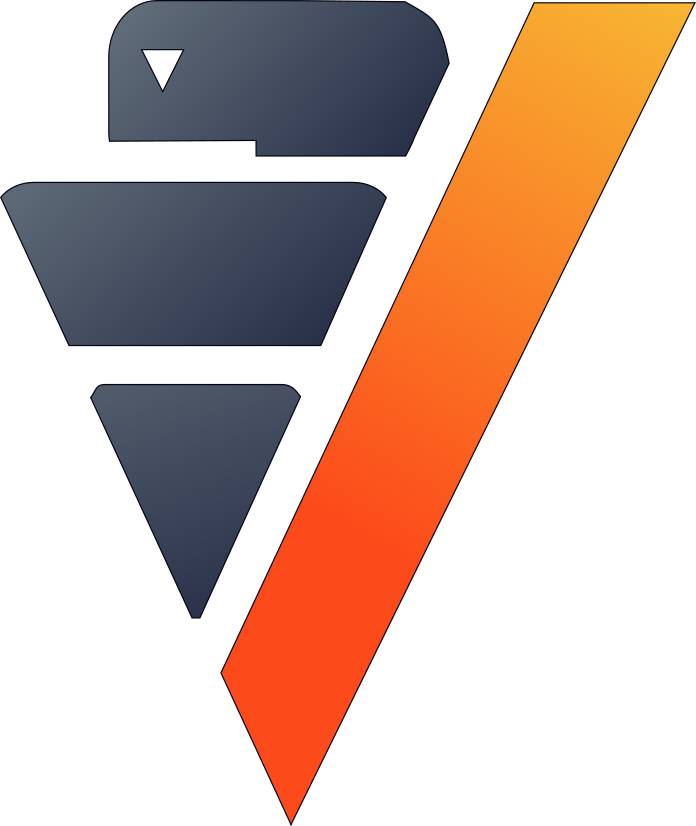

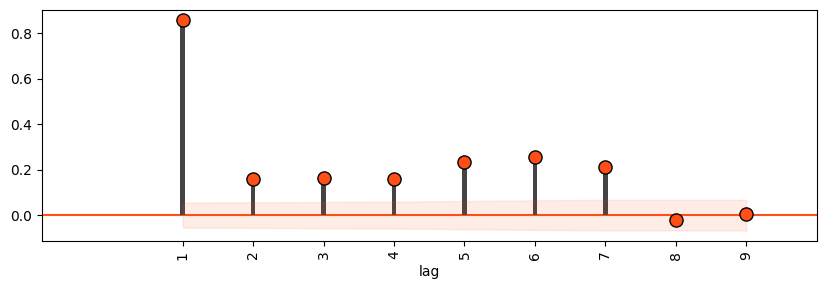

In [5]:
data.pacf("n", ts="starttime_dt", p=[l for l in range(1, 10)])


Bazı durumlarda yakın geçmişe erişimimiz bulunmuyor (veri geç gelmesi vb sorunlar) Bu durumda manuel olarak işimize en çok yarayacağını düşündüğümüz (domain bilgisi) `p`(lag değişken) değerleri üzerinden bir arama yapmak mümkün olacaktır. Burada 1 ila 3 ay öncesinde kullanmamız gerekecek değişkenleri belirlemeye çalışıyoruz. 

Son 1 ayın verisini kullanmayacak olmamıza rağmen rejim farklılığı (business in değişmesi gibi düşünülebilir) olmayan zaman eğrilerinde oldukça kabul edilebilir başarımlar elde etmek mümkün olacaktır.

100%|██████████| 60/60 [05:46<00:00,  5.78s/it]


,value,confidence
31,-0.0384795939828126,0.05486845783435862
32,-0.0246875516178713,0.05492341454687986
33,-0.0162926647529599,0.054959531323269965
34,0.0290925173704906,0.05502754742664001
35,-0.000576507741485754,0.05504919173574799
36,-0.0943636013134281,0.05555738906875271
37,-0.0529352265326373,0.05573154890691536
38,0.0131388842715465,0.05576287565627408
39,-0.0720622140547662,0.05606616788039802
40,-0.035599699086755,0.05615675508947745

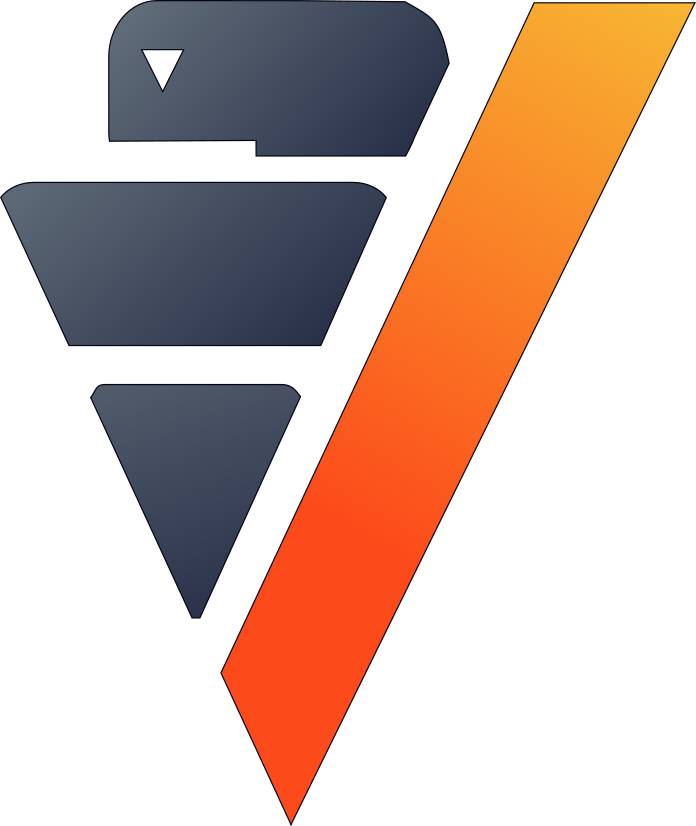

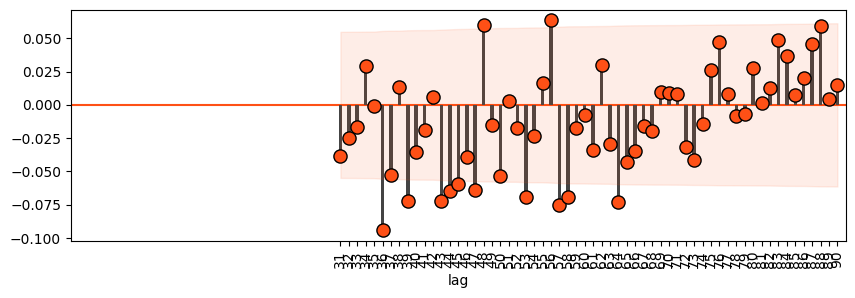

In [6]:
data.pacf("n", ts="starttime_dt", p=[l for l in range(31, 91)])
